In [0]:
import numpy 
print(numpy.__version__)

1.14.6


In [0]:
import matplotlib 
print(matplotlib.__version__)

3.0.2


In [0]:
import PIL 
print(PIL.__version__)

4.0.0


In [0]:
import tensorflow 
print(tensorflow.__version__)

1.12.0


In [0]:
import cv2 
print(cv2.__version__)

3.4.3


In [1]:
import slidingwindow
# print(dir(slidingwindow))
print(slidingwindow.__file__)

/usr/local/lib/python3.6/dist-packages/slidingwindow-0.0.13-py3.6.egg/slidingwindow/__init__.py


In [16]:
import moviepy 
print(moviepy.__version__)

0.2.3.5


In [5]:
!git clone https://github.com/21-projects-for-deep-learning/tf-pose-estimation.git

Cloning into 'tf-pose-estimation'...
remote: Enumerating objects: 1238, done.
remote: Total 1238 (delta 0), reused 0 (delta 0), pack-reused 1238
Receiving objects: 100% (1238/1238), 84.37 MiB | 30.71 MiB/s, done.
Resolving deltas: 100% (649/649), done.


In [1]:
import os
os.chdir("tf-pose-estimation")

!ls

build		launch		   run_directory.py	 test_video_1.mp4
CMakeLists.txt	LICENSE		   run.py		 test_video_1_out.mp4
dist		models		   run_video.py		 test_video.mp4
docker		msg		   run_webcam.py	 test_video_out.mp4
Dockerfile	package.xml	   scripts		 tf_pose
etcs		README.md	   setup.py		 tf_pose.egg-info
images		requirements.txt   test_video_0.mp4
__init__.py	run_checkpoint.py  test_video_0_out.mp4


In [7]:
!python setup.py install

--2019-01-26 03:21:57--  http://download692.mediafire.com/ml13intrdgag/qlzzr20mpocnpa3/graph_opt.pb
Resolving download692.mediafire.com (download692.mediafire.com)... 205.196.120.140
Connecting to download692.mediafire.com (download692.mediafire.com)|205.196.120.140|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209299198 (200M) [application/octet-stream]
Saving to: ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’

/content/tf-pose-es 100%[===================>] 199.60M  5.17MB/s    in 43s     

2019-01-26 03:22:40 (4.68 MB/s) - ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’ saved [209299198/209299198]

running install
running bdist_egg
running egg_info
creating tf_pose.egg-info
writing tf_pose.egg-info/PKG-INFO
writing dependency_links to tf_pose.egg-info/dependency_links.txt
writing requirements to tf_pose.egg-info/requires.txt
writing top-level names to tf_pose.egg-info/top_level.txt
writing manifest file 'tf_pose.egg-info/SOURCES.txt

In [8]:
!ls

build		images	     package.xml	run_video.py
CMakeLists.txt	__init__.py  README.md		run_webcam.py
dist		launch	     requirements.txt	scripts
docker		LICENSE      run_checkpoint.py	setup.py
Dockerfile	models	     run_directory.py	tf_pose
etcs		msg	     run.py		tf_pose.egg-info


In [0]:
!pip install slidingwindow

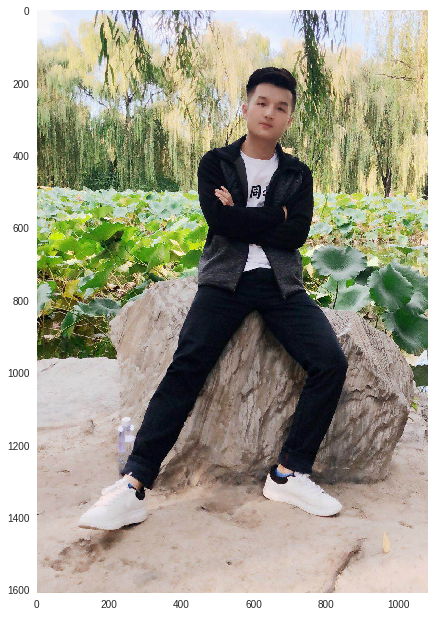

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
victor_test_img_0 = Image.open('images/Victor_test_1.jpg')
victor_test_img_0 = np.asarray(victor_test_img_0)
fig, ax = plt.subplots(figsize=(7, 12))
ax.imshow(victor_test_img_0)
plt.grid(False)
plt.show()

[2019-01-26 09:27:40,406] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=375x667)


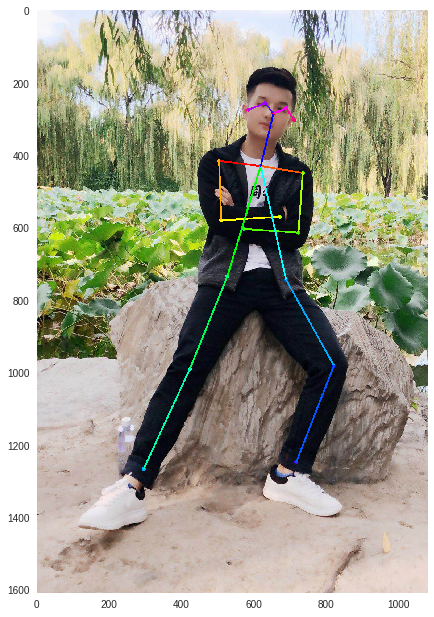

In [2]:
import time
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path

model = "cmu" #"mobilenet_thin"
resize_out_ratio = 4.0

window_width = 375
window_height = 667
estimator = TfPoseEstimator(get_graph_path(model), target_size=(window_width, window_height))

victor_test_img = Image.open('images/Victor_test_1.jpg')
victor_test_img = np.asarray(victor_test_img)
humans = estimator.inference(victor_test_img, 
                             resize_to_default=(window_width > 0 and window_height > 0), 
                             upsample_size=resize_out_ratio)

image = TfPoseEstimator.draw_humans(victor_test_img, humans, imgcopy=False)

fig, ax = plt.subplots(figsize=(7, 12))
ax.imshow(image)
plt.grid(False)
plt.show()

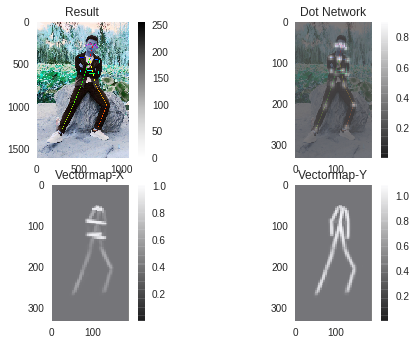

In [6]:
import cv2

# 第一张
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
a.set_title('Result')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.colorbar()

# 第二张
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, 
                   (estimator.heatMat.shape[1], estimator.heatMat.shape[0]), 
                   interpolation=cv2.INTER_AREA)
a = fig.add_subplot(2, 2, 2)
plt.imshow(bgimg, alpha=0.5)
tmp = np.amax(estimator.heatMat[:, :, :-1], axis=2)
plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
a.set_title('Dot Network')
plt.grid(False)
plt.colorbar()

# 第三张
tmp2 = estimator.pafMat.transpose((2, 0, 1))
tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)

a = fig.add_subplot(2, 2, 3) 
a.set_title('Vectormap-X') 
plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
plt.grid(False)
plt.colorbar()

# 第四张
a = fig.add_subplot(2, 2, 4) 
a.set_title('Vectormap-Y') 
plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar() 
plt.grid(False)
plt.show()

# 视频转换

In [23]:
from moviepy.editor import VideoFileClip
import cv2
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path

width = 375
height = 667
estimator = TfPoseEstimator(get_graph_path("cmu"), target_size=(width, height))
def process_frame(frame):   
    humans = estimator.inference(frame, resize_to_default=False, upsample_size=4.0)
    image = TfPoseEstimator.draw_humans(frame, humans, imgcopy=False)
    return image

input_filename = 'test_video_1.mp4'
output_filename = 'test_video_1_out.mp4'

clip_playing = VideoFileClip(input_filename).subclip(0, 10) 
white_clip = clip_playing.fl_image(process_frame) 

%time white_clip.write_videofile(output_filename)

[2019-01-26 07:32:31,498] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose_data/graph/cmu/graph_opt.pb(default size=375x667)


[MoviePy] >>>> Building video test_video_1_out.mp4
[MoviePy] Writing audio in test_video_1_outTEMP_MPY_wvf_snd.mp3



100%|██████████| 221/221 [00:00<00:00, 942.97it/s]

[MoviePy] Done.
[MoviePy] Writing video test_video_1_out.mp4



100%|█████████▉| 300/301 [15:25<00:03,  3.07s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_1_out.mp4 

CPU times: user 29min 9s, sys: 10.3 s, total: 29min 20s
Wall time: 15min 26s


In [24]:
import io
import base64
from IPython.display import HTML

video = io.open('test_video_1_out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

# 实时拍摄识别

In [0]:
import time
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

fps_time = 0
model = "mobilenet_thin"
camera = 0
resize_out_ratio = 4.0

window_width = 600
window_height = 400
estimator = TfPoseEstimator(get_graph_path(model), target_size=(window_width, window_height))

video_capture = cv2.VideoCapture(0)
while True:
    ret_val, image = video_capture.read()
    humans = estimator.inference(image, 
                                 resize_to_default=(window_width > 0 and window_height > 0), 
                                 upsample_size=resize_out_ratio)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    cv2.putText(image,
                "FPS: {}".format(1.0 / (time.time() - fps_time)),
                (10, 10),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (0, 255, 0), 2)
    cv2.imshow('Pose Estimation in Realtime', image)
    fps_time = time.time()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()